In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## ***01: Estatística Básica dos Atletas:***

### **Carregando Dataset:**

In [4]:
import pandas as pd

class DataLoader:
    def __init__(self, athlete_bio_path, athlete_event_results_path, medal_tally_path, olympics_results_path, olympics_country_path, olympics_games_path):
        self.athlete_bio_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Athlete_Bio.csv'
        self.athlete_event_results_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Athlete_Event_Results.csv'
        self.medal_tally_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Games_Medal_Tally.csv'
        self.olympics_results_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Results.csv'
        self.olympics_country_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympics_Country.csv'
        self.olympics_games_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympics_Games.csv'

    def load_athlete_bio(self):
        return pd.read_csv(self.athlete_bio_path)

    def load_athlete_event_results(self):
        return pd.read_csv(self.athlete_event_results_path)

    def load_medal_tally(self):
        return pd.read_csv(self.medal_tally_path)

    def load_olympics_results(self):
        return pd.read_csv(self.olympics_results_path)

    def load_olympics_country(self):
        return pd.read_csv(self.olympics_country_path)

    def load_olympics_games(self):
        return pd.read_csv(self.olympics_games_path)

### ***Classe para Análise Exploratória dos Dados***

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class DataAnalyzer:
    def __init__(self, athlete_bio, medal_tally):
        self.athlete_bio = athlete_bio
        self.medal_tally = medal_tally
        
        # Verificar e converter tipos de dados
        self.athlete_bio['height'] = pd.to_numeric(self.athlete_bio['height'], errors='coerce')
        self.athlete_bio['weight'] = pd.to_numeric(self.athlete_bio['weight'], errors='coerce')
        
        # Remover valores ausentes
        self.athlete_bio = self.athlete_bio.dropna(subset=['height', 'weight'])

    def basic_statistics(self):
        print(self.athlete_bio[['height', 'weight']].describe())

    def plot_height_distribution(self):
        plt.figure(figsize=(12, 6))
        sns.histplot(self.athlete_bio['height'], bins=30, kde=True)
        plt.title('Distribuição da Altura dos Atletas')
        plt.xlabel('Altura (cm)')
        plt.ylabel('Frequência')
        plt.show()

    def plot_weight_distribution(self):
        plt.figure(figsize=(12, 6))
        sns.histplot(self.athlete_bio['weight'], bins=30, kde=True)
        plt.title('Distribuição do Peso dos Atletas')
        plt.xlabel('Peso (kg)')
        plt.ylabel('Frequência')
        plt.show()

    def plot_height_by_sex(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='sex', y='height', data=self.athlete_bio)
        plt.title('Distribuição da Altura por Sexo')
        plt.xlabel('Sexo')
        plt.ylabel('Altura (cm)')
        plt.show()

    def plot_weight_by_sex(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='sex', y='weight', data=self.athlete_bio)
        plt.title('Distribuição do Peso por Sexo')
        plt.xlabel('Sexo')
        plt.ylabel('Peso (kg)')
        plt.show()

    def plot_height_by_country(self):
        plt.figure(figsize=(15, 10))
        top_countries = self.athlete_bio['country'].value_counts().nlargest(10).index
        filtered_data = self.athlete_bio[self.athlete_bio['country'].isin(top_countries)]
        sns.boxplot(x='country', y='height', data=filtered_data)
        plt.xticks(rotation=45)
        plt.title('Distribuição da Altura dos Atletas por País')
        plt.xlabel('País')
        plt.ylabel('Altura (cm)')
        plt.show()

    def plot_weight_by_country(self):
        plt.figure(figsize=(15, 10))
        top_countries = self.athlete_bio['country'].value_counts().nlargest(10).index
        filtered_data = self.athlete_bio[self.athlete_bio['country'].isin(top_countries)]
        sns.boxplot(x='country', y='weight', data=filtered_data)
        plt.xticks(rotation=45)
        plt.title('Distribuição do Peso dos Atletas por País')
        plt.xlabel('País')
        plt.ylabel('Peso (kg)')
        plt.show()


### Classe para Visualização dos Dados

In [6]:
class DataVisualizer:
    def __init__(self, data_analyzer):
        self.data_analyzer = data_analyzer

    def run_all_visualizations(self):
        self.data_analyzer.basic_statistics()
        self.data_analyzer.plot_height_distribution()
        self.data_analyzer.plot_weight_distribution()
        self.data_analyzer.plot_height_by_sex()
        self.data_analyzer.plot_weight_by_sex()
        self.data_analyzer.plot_height_by_country()
        self.data_analyzer.plot_weight_by_country()


              height         weight
count  104151.000000  104151.000000
mean      176.326488      71.868268
std        10.364377      14.410168
min       127.000000      25.000000
25%       170.000000      62.000000
50%       176.000000      70.000000
75%       183.000000      80.000000
max       226.000000     198.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


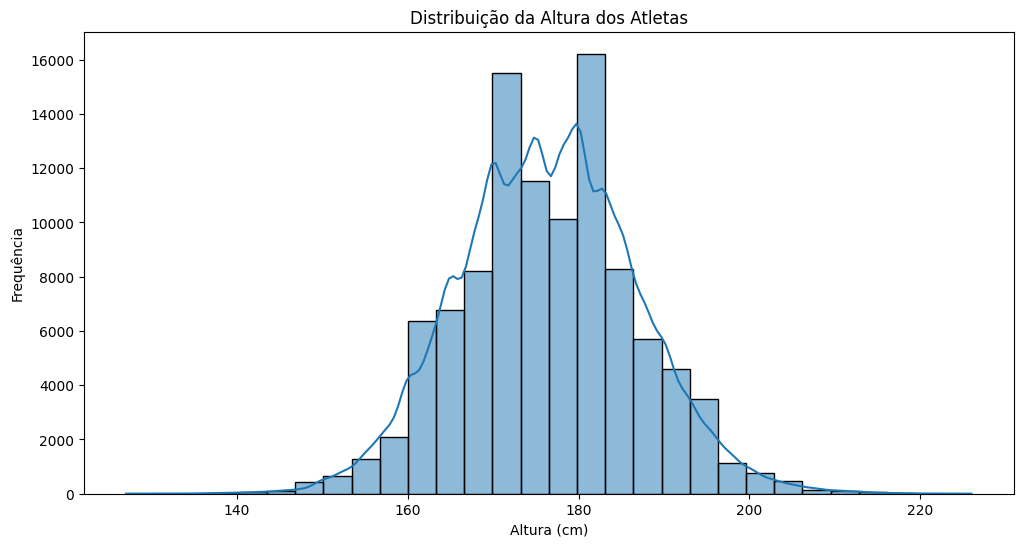

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


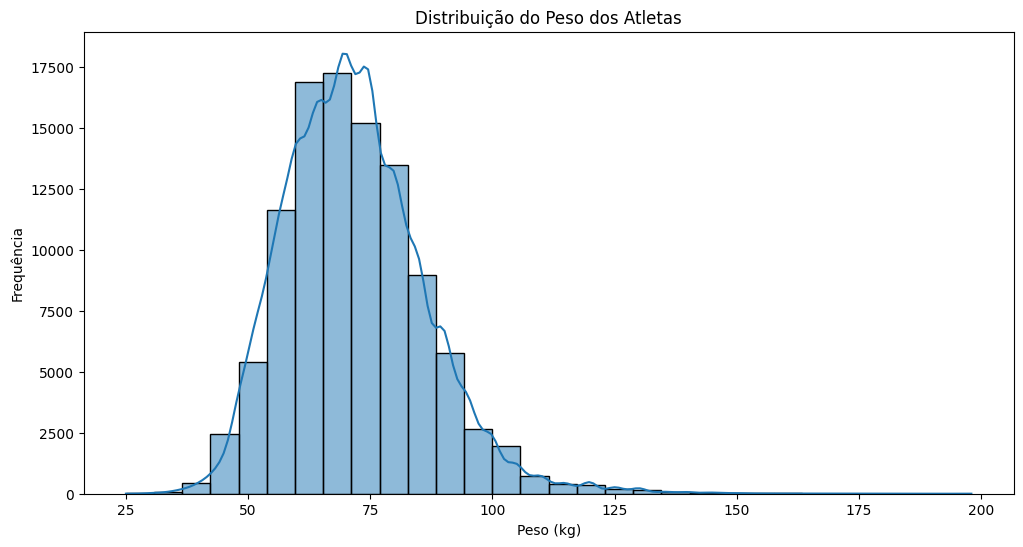

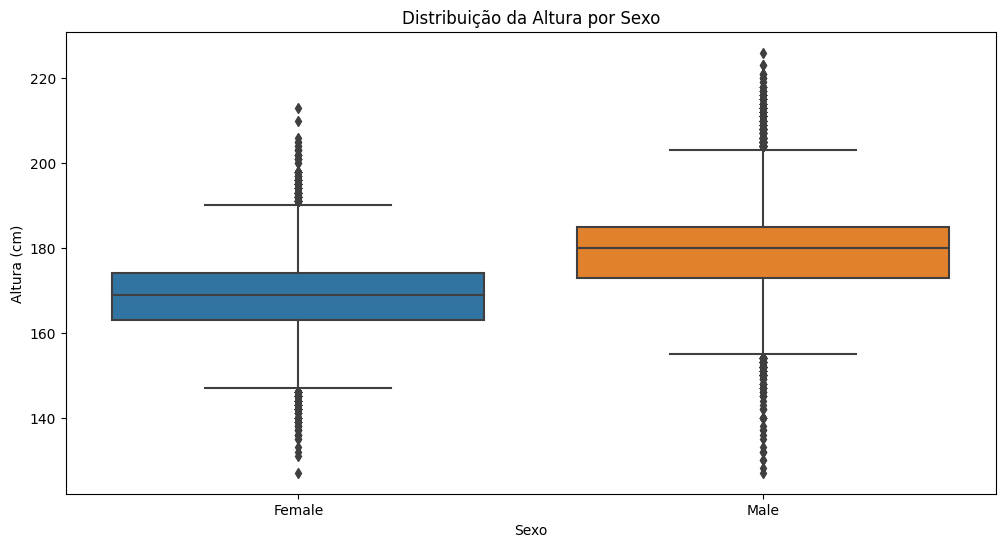

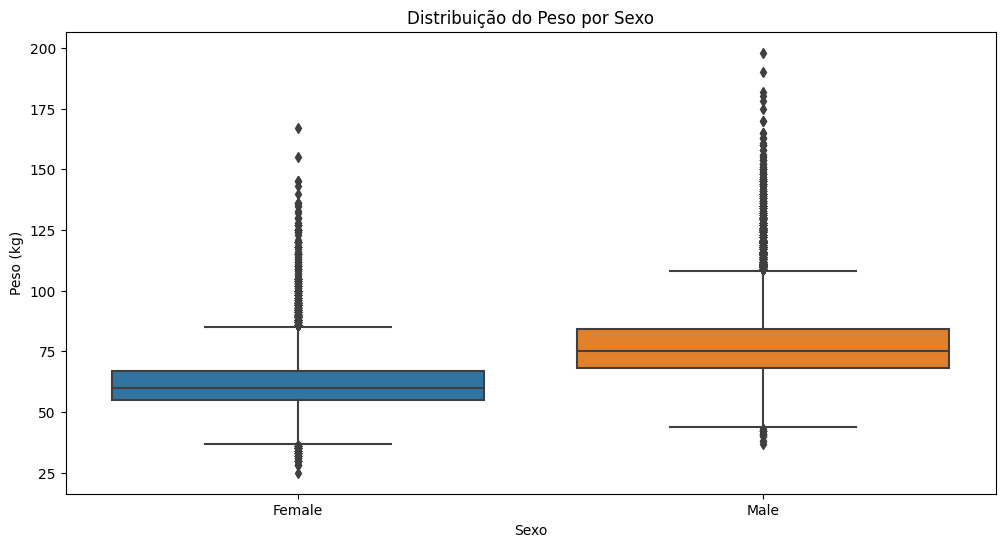

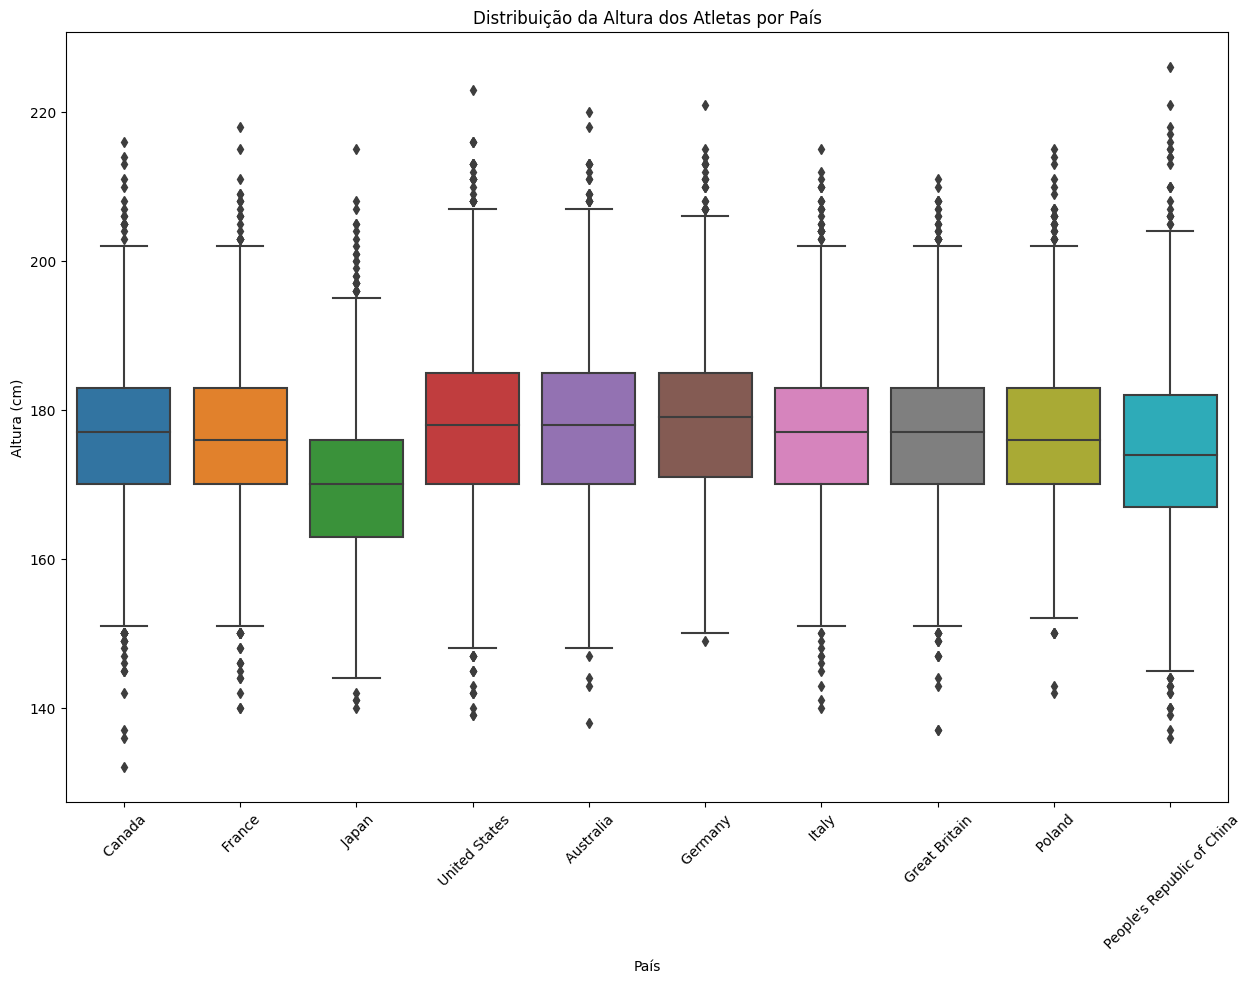

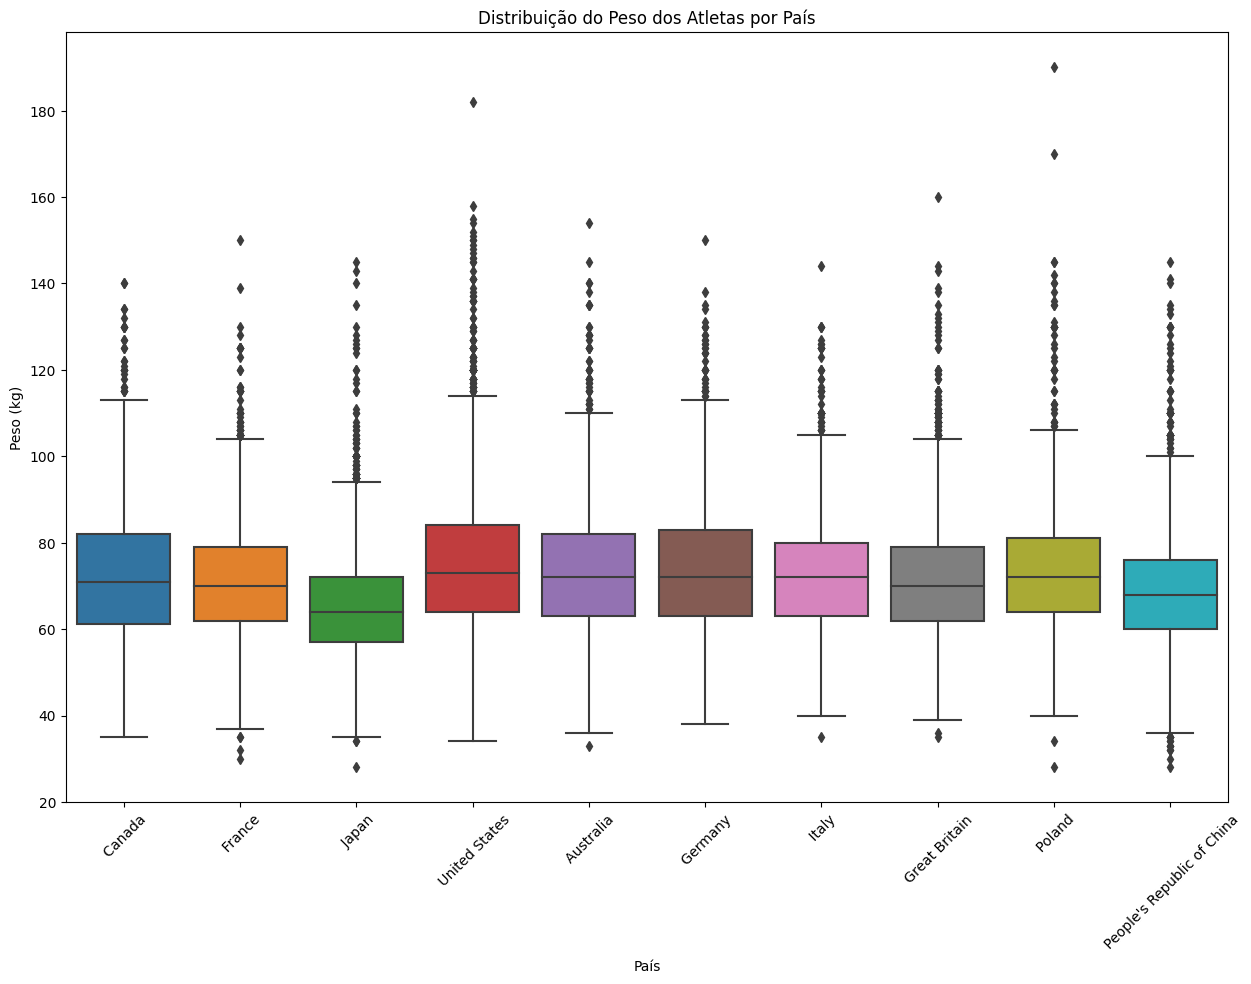

In [9]:
# Paths para os arquivos CSV
athlete_bio_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Athlete_Bio.csv'
athlete_event_results_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Athlete_Event_Results.csv'
medal_tally_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Games_Medal_Tally.csv'
olympics_results_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympic_Results.csv'
olympics_country_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympics_Country.csv'
olympics_games_path = '/kaggle/input/olympic-historical-dataset-1896-2020/Olympics_Games.csv'

# Carregar dados
data_loader = DataLoader(athlete_bio_path, athlete_event_results_path, medal_tally_path, olympics_results_path, olympics_country_path, olympics_games_path)
athlete_bio = data_loader.load_athlete_bio()
medal_tally = data_loader.load_medal_tally()

# Análise e visualização
data_analyzer = DataAnalyzer(athlete_bio, medal_tally)
data_visualizer = DataVisualizer(data_analyzer)
data_visualizer.run_all_visualizations()


## **Testes para o ADE**

Test passed for load_athlete_bio
Test passed for load_medal_tally
              height         weight
count  104151.000000  104151.000000
mean      176.326488      71.868268
std        10.364377      14.410168
min       127.000000      25.000000
25%       170.000000      62.000000
50%       176.000000      70.000000
75%       183.000000      80.000000
max       226.000000     198.000000
Test passed for basic_statistics


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


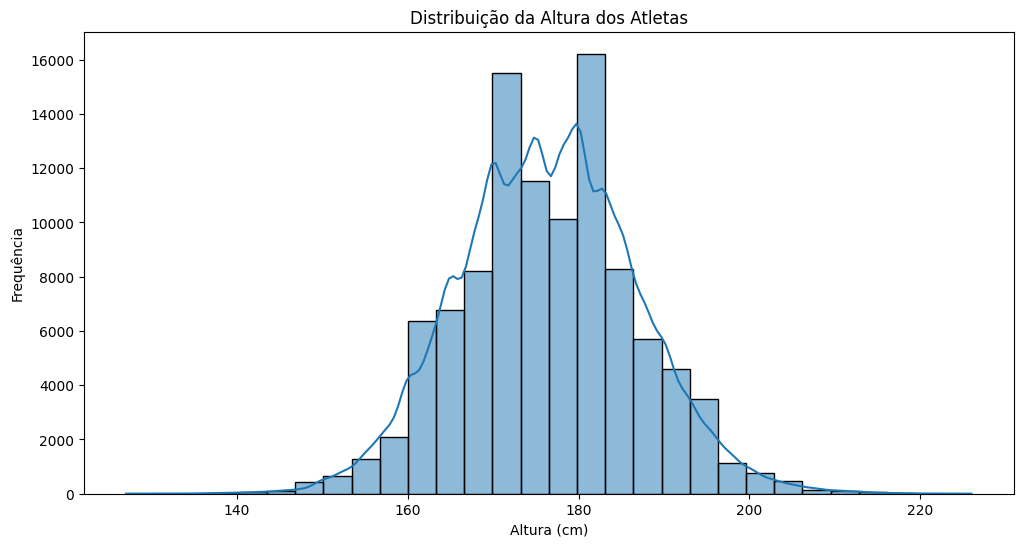

Test passed for plot_height_distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


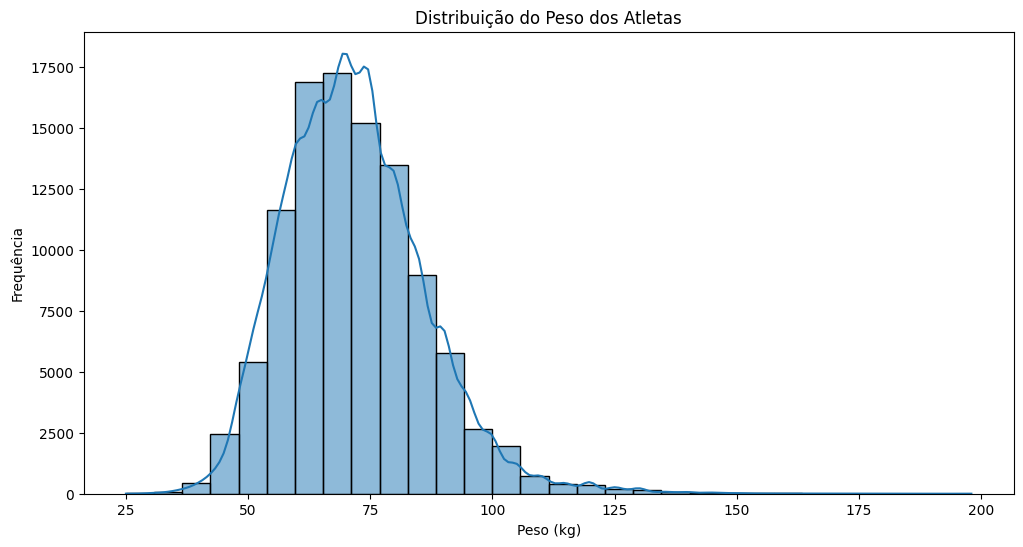

Test passed for plot_weight_distribution


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Definições das classes (DataLoader e DataAnalyzer) que você já tem

# Funções de teste para DataLoader
def test_load_athlete_bio(data_loader):
    df = data_loader.load_athlete_bio()
    assert isinstance(df, pd.DataFrame), "O retorno não é um DataFrame"
    assert 'athlete_id' in df.columns, "Coluna 'athlete_id' não encontrada"
    assert 'height' in df.columns, "Coluna 'height' não encontrada"
    assert 'weight' in df.columns, "Coluna 'weight' não encontrada"
    print("Test passed for load_athlete_bio")

def test_load_medal_tally(data_loader):
    df = data_loader.load_medal_tally()
    assert isinstance(df, pd.DataFrame), "O retorno não é um DataFrame"
    assert 'gold' in df.columns, "Coluna 'gold' não encontrada"
    assert 'silver' in df.columns, "Coluna 'silver' não encontrada"
    print("Test passed for load_medal_tally")

# Funções de teste para DataAnalyzer
def test_basic_statistics(data_analyzer):
    try:
        data_analyzer.basic_statistics()
        print("Test passed for basic_statistics")
    except Exception as e:
        print(f"Test failed for basic_statistics: {e}")

def test_plot_height_distribution(data_analyzer):
    try:
        data_analyzer.plot_height_distribution()
        print("Test passed for plot_height_distribution")
    except Exception as e:
        print(f"Test failed for plot_height_distribution: {e}")

def test_plot_weight_distribution(data_analyzer):
    try:
        data_analyzer.plot_weight_distribution()
        print("Test passed for plot_weight_distribution")
    except Exception as e:
        print(f"Test failed for plot_weight_distribution: {e}")

# Teste de execução geral
def run_tests():
    # Inicializando DataLoader e DataAnalyzer com dados de exemplo
    data_loader = DataLoader(
        'Athlete_Bio.csv',
        'Olympic_Athlete_Event_Results.csv',
        'Olympic_Games_Medal_Tally.csv',
        'Olympics_Results.csv',
        'Olympics_Country.csv',
        'Olympics_Games.csv'
    )

    # Testes para DataLoader
    test_load_athlete_bio(data_loader)
    test_load_medal_tally(data_loader)

    # Carregar dados
    athlete_bio = data_loader.load_athlete_bio()
    medal_tally = data_loader.load_medal_tally()

    # Inicializando DataAnalyzer
    data_analyzer = DataAnalyzer(athlete_bio, medal_tally)

    # Testes para DataAnalyzer
    test_basic_statistics(data_analyzer)
    test_plot_height_distribution(data_analyzer)
    test_plot_weight_distribution(data_analyzer)

# Execute os testes
run_tests()
